In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-data/Advertising.csv


In [84]:
'''
Step-01: Importing libraries
Step-02: Read the data
Step-03: Check tha shape of the data
Step-04: View the samples

'''

'\nStep-01: Importing libraries\nStep-02: Read the data\nStep-03: Check tha shape of the data\nStep-04: View the samples\n\n'

In [85]:
import pandas as pd      #used for reading data
df=pd.read_csv('/kaggle/input/advertising-data/Advertising.csv')

In [86]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [87]:
df.shape

(200, 5)

In [88]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: >

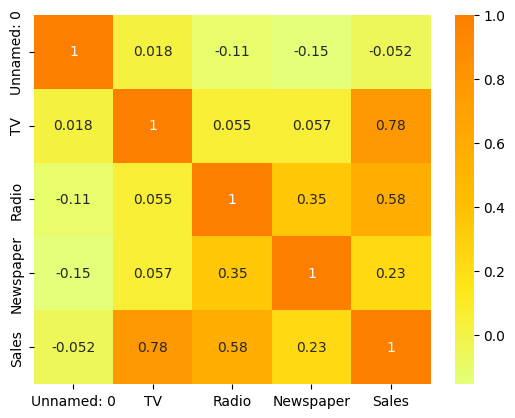

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
#corelation
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)

<Axes: xlabel='Sales', ylabel='Count'>

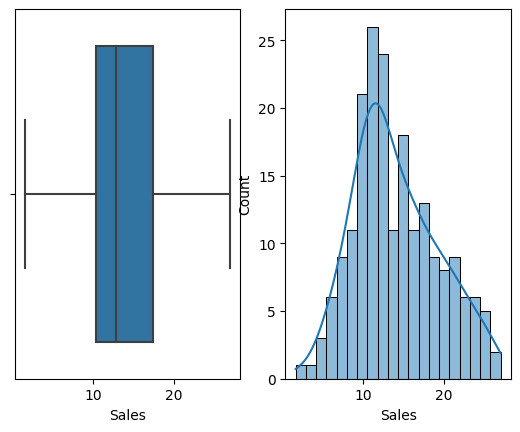

In [90]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.boxplot(x='Sales',data=df,ax=ax1)
sns.histplot(x='Sales',data=df,kde=True,bins=20,ax=ax2)

<Axes: xlabel='TV', ylabel='Count'>

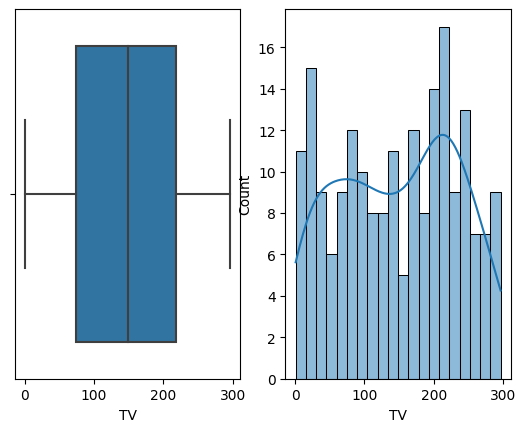

In [91]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.boxplot(x='TV',data=df,ax=ax1)
sns.histplot(x='TV',data=df,kde=True,bins=20,ax=ax2)

<Axes: xlabel='Radio', ylabel='Count'>

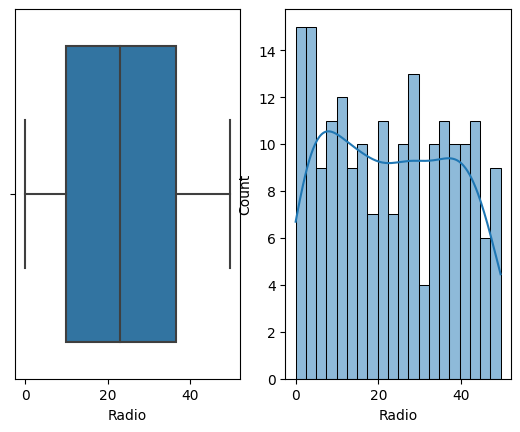

In [92]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.boxplot(x='Radio',data=df,ax=ax1)
sns.histplot(x='Radio',data=df,kde=True,bins=20,ax=ax2)

<Axes: xlabel='Newspaper', ylabel='Count'>

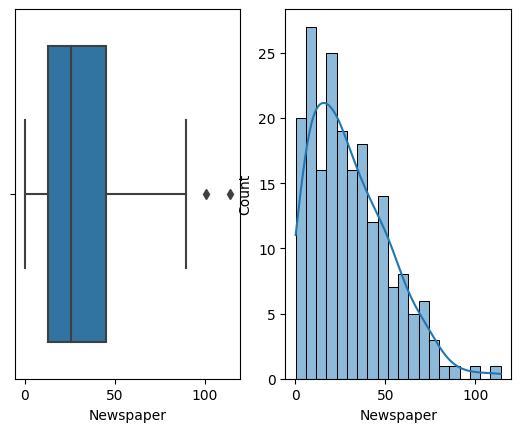

In [93]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
sns.boxplot(x='Newspaper',data=df,ax=ax1)
sns.histplot(x='Newspaper',data=df,kde=True,bins=20,ax=ax2)

<Axes: xlabel='Newspaper'>

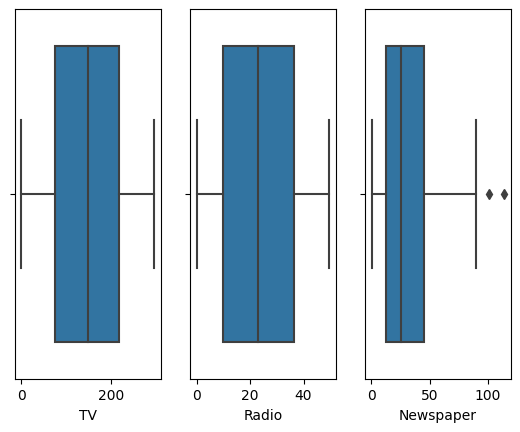

In [94]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
sns.boxplot(x='TV',hue='Sales',data=df,ax=ax1)
sns.boxplot(x='Radio',hue='Sales',data=df,ax=ax2)
sns.boxplot(x='Newspaper',hue='Sales',data=df,ax=ax3)

Text(0.5, 1.0, 'TV vs Sales')

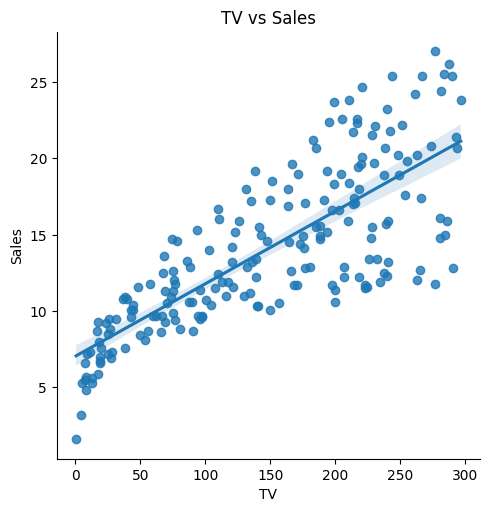

In [95]:
sns.lmplot(x='TV',y='Sales',data=df)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

Text(0.5, 1.0, 'Radio vs Sales')

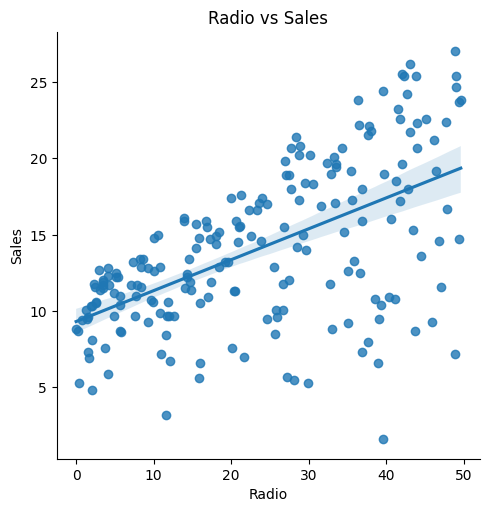

In [96]:
sns.lmplot(x='Radio',y='Sales',data=df)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio vs Sales")

Text(0.5, 1.0, 'Newspaper vs Sales')

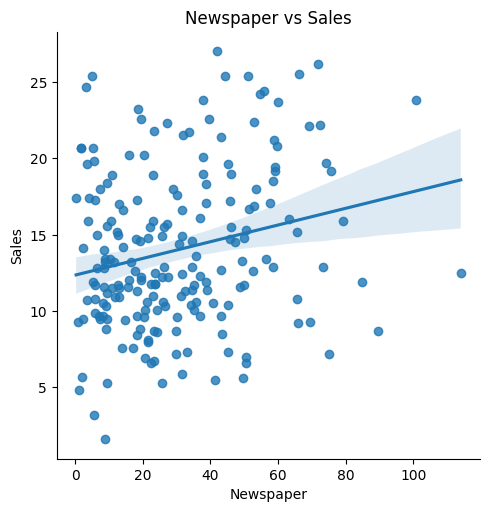

In [97]:
sns.lmplot(x='Newspaper',y='Sales',data=df)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")

In [98]:
x=df.drop(['Sales'],axis=1)  # input features
y=df['Sales']   #target feature

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [100]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [101]:
lin_reg.coef_

array([0.0013015 , 0.04582739, 0.17759903, 0.00128162])

In [102]:
lin_reg.intercept_

2.86537603234831

In [103]:
y_pred=lin_reg.predict(x_test)
y_pred

array([10.07406249, 21.40998259, 18.69135985, 13.56886422, 18.14023079,
        6.78077142, 15.22418173, 13.91087584, 23.66502311, 13.90577449,
       20.53690459, 11.61442702,  8.84124715, 14.73695382,  8.50099012,
       15.30071337, 10.19797695,  8.01416107, 18.98822037,  9.44833352,
       24.52220703, 20.3080336 , 17.11672741,  6.68121204,  8.25681005,
       23.15752632, 21.45980648, 15.43300605,  9.24368798, 10.07111537,
       15.76074326,  9.72559342, 13.50950925,  7.23174659, 18.3108494 ,
       17.66144075,  3.64544461, 14.40040692, 17.88934041, 17.63914185,
       21.31590774,  6.96997233,  7.5802796 ,  8.69399999, 21.83549605,
       10.60844259, 19.14725613, 20.72331576, 10.74991041, 16.2914202 ,
        3.71142687,  6.14857047, 16.59622105, 22.88906567,  9.94417973,
       12.42124838, 17.12827796, 16.27625293,  7.80420596, 20.9036164 ])

In [104]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

2.6323157202792506

In [105]:
lin_reg.score(x_test,y_test)

0.9253808908555915